# Furuta Pendulum

Ecuaciones del pendulo de furuta extraidas del artículo "On the Dynamics of the furuta Pendulum" https://www.hindawi.com/journals/jcse/2011/528341/

In [1]:
import matplotlib.animation as animation
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
import random

Punto de equilibrio Upright Position:

$\theta_{1e}=0$

$\dot\theta_{1e}=\pi$

$\theta_{2e}=0$

$\dot\theta_{2e}=0$

In [2]:
g=9.81

L1 = 0.278#m
L2 = 0.300
l1 = 0.150
l2 = 0.148
m1 = 0.300#kg
m2 = 0.075#kg
J1 = 2.48e-2#kg*m²
J2 = 3.86e-3
b1 = 1.00e-4 #Nms
b2 = 2.80e-4
Lm = 0.005#H
Rm = 7.8#ohm
Km = 0.090#Nm/A

J1_hat = J1 + m1*l1**2
J2_hat = J2 + m2*l2**2

J0_hat = J1 + m1*l1**2+ m2*L1**2

p =  J0_hat*J2_hat-m2**2*L1**2*l2**2

In [3]:
A31 = 0
A32 = g*m2**2*l2**2*L1/p
A33 = -b1*J2_hat/p
A34 = -b2*m2*l2*L1/p

A41 = 0
A42 = g*m2*l2*J0_hat/p
A43 = -b1*m2*l2*L1/p
A44 = -b2*J0_hat/p

B31 = J2_hat/p
B41 = m2*L1*l2/p
B32 = m2*L1*l2/p
B42 = J0_hat/p

In [4]:
#downward position
A34 = -A34
A42 = -A42
A43 = -A43
B32 = -B32
B41 = -B41

In [5]:

A = np.matrix([[0  , 0  , 1  ,   0],
               [0  , 0  , 0  ,   1],
               [A31, A32, A33,  A34],
               [A41, A42, A43,  A44]])

B = np.matrix([[0   ],
               [0   ],
               [B31 ],
               [B41 ]])

C = np.eye(4)

D = np.zeros([4,1])


states = ['theta1', 'theta2', 'theta1_dot', 'theta2_dot']#,'i']
inputs = ['V']
outputs = ['theta1', 'theta2', 'theta1_dot', 'theta2_dot']#,'i']

In [6]:
furuta_torque = ctrl.ss(A,B,C,D)#, states=states, inputs=inputs, outputs=outputs)
furuta_torque

<LinearIOSystem:sys[2]:['u[0]']->['y[0]', 'y[1]', 'y[2]', 'y[3]']>

(array([ 0.        +0.j        , -0.02674274+4.55510717j,
        -0.02674274-4.55510717j, -0.00267764+0.j        ]),
 array([], dtype=float64))

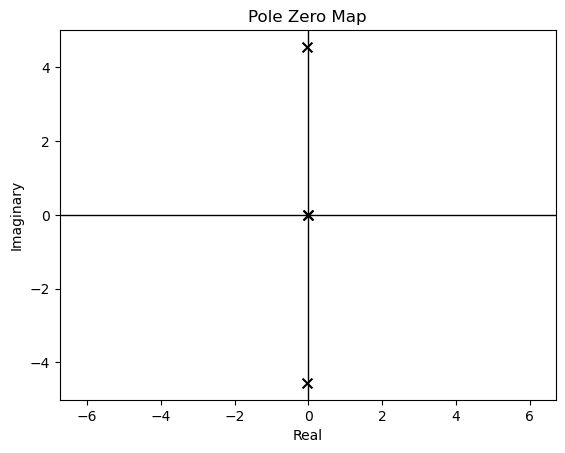

In [7]:
ctrl.pzmap(furuta_torque)

In [20]:
t,y=ctrl.step_response(furuta_torque,T=np.linspace(0,1000,10000))

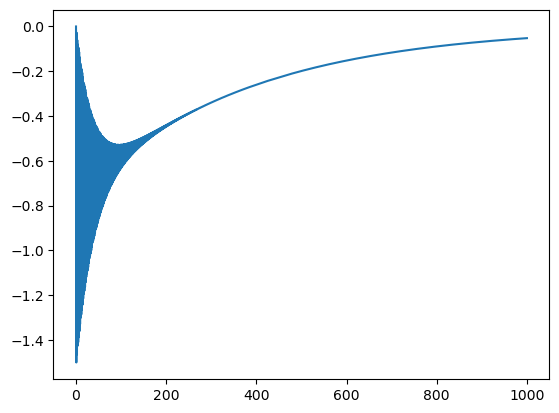

In [21]:
plt.plot(t,y[1,0])

In [22]:
y[1,0][-1]

-0.05214901937397304

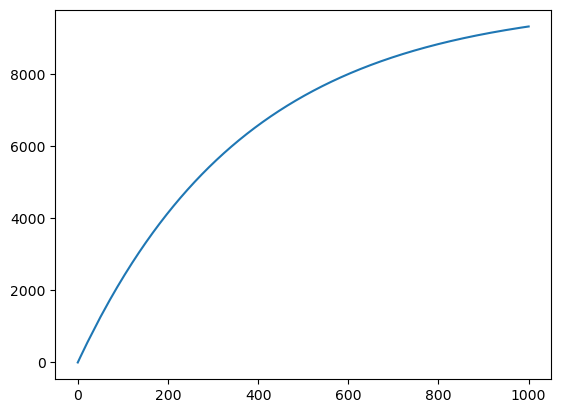

In [23]:
plt.plot(t,y[2,0])

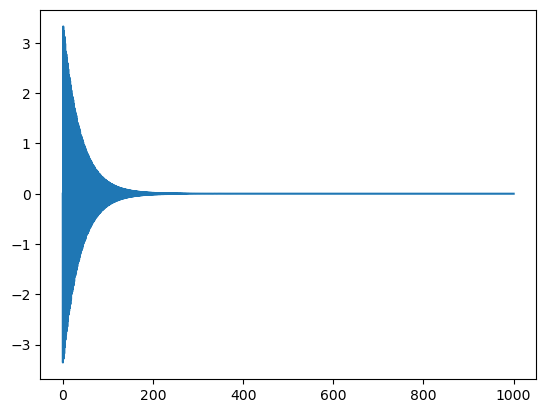

In [24]:
plt.plot(t,y[3,0])

In [25]:
Co=ctrl.ctrb(A,B)
np.linalg.matrix_rank(Co),np.linalg.det(Co)

(3, -1606682128904605.5)

In [26]:

A = np.matrix([[0  , 0  , 1  ,   0 , 0],
               [0  , 0  , 0  ,   1 , 0],
               [A31, A32, A33,  A34, B31*Km],
               [A41, A42, A43,  A44, B41*Km],
               [0  , 0  ,-Km/Lm, 0 , -Rm/Lm ]])

B = np.matrix([[0 ],
               [0 ],
               [0 ],
               [0 ],
               [1/Lm]])

C = np.eye(5)

D = np.zeros([5,1])


states = ['theta1', 'theta2', 'theta1_dot', 'theta2_dot','i']
inputs = ['V']
outputs = ['theta1', 'theta2', 'theta1_dot', 'theta2_dot','i']

In [27]:
furuta = ctrl.ss(A,B,C,D, states=states, inputs=inputs, outputs=outputs)
furuta

<LinearIOSystem:sys[7]:['V']->['theta1', 'theta2', 'theta1_dot', 'theta2_dot', 'i']>

(array([ 0.00000000e+00+0.j       , -1.55997084e+03+0.j       ,
        -2.74182421e-02+4.5551002j, -2.74182421e-02-4.5551002j,
        -3.04845275e-02+0.j       ]),
 array([], dtype=float64))

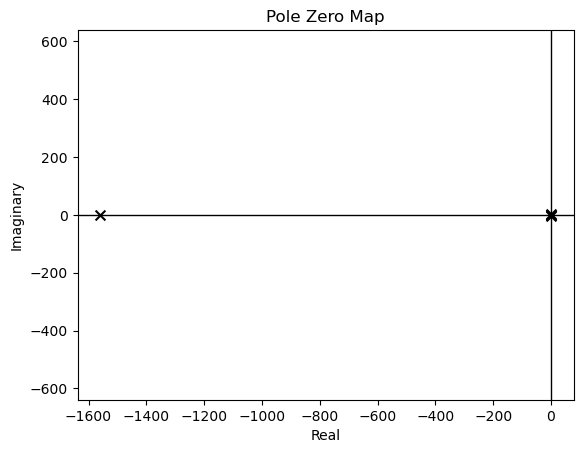

In [28]:
ctrl.pzmap(furuta)

In [29]:
Co=ctrl.ctrb(A,B)
np.linalg.matrix_rank(Co),np.linalg.det(Co)

(3, -1606682128904605.5)

In [42]:
sys,T=ctrl.canonical_form(furuta,'modal')
sys

StateSpace(array([[ 0.00000000e+00,  4.26519075e-12,  3.51344163e-14,
        -7.91895986e-16,  1.40246382e-16],
       [ 0.00000000e+00, -1.55997084e+03,  1.83575377e-13,
         1.43662859e-13,  2.66453526e-15],
       [ 0.00000000e+00, -3.16261774e-15, -2.74182421e-02,
        -9.99964607e-01,  4.82183564e-17],
       [ 0.00000000e+00,  9.01357033e-14,  2.07496723e+01,
        -2.74182421e-02, -1.67916936e-17],
       [ 0.00000000e+00, -4.26687071e-12, -3.90290441e-14,
        -4.21090868e-15, -3.04845275e-02]]), array([[ 1.01351351e+01],
       [ 2.00004083e+02],
       [ 4.05869323e-04],
       [-1.82294509e-01],
       [-1.01400863e+01]]), array([[ 1.00000000e+00,  1.03840419e-06,  8.23502810e-02,
        -5.83625245e-06,  9.99535608e-01],
       [ 0.00000000e+00, -5.82319204e-07, -9.96599339e-01,
        -1.39351924e-03, -2.63236824e-05],
       [ 0.00000000e+00, -1.61988026e-03, -2.37900026e-03,
        -8.23472063e-02, -3.04703707e-02],
       [ 0.00000000e+00,  9.08400979e-0

In [35]:
t,y=ctrl.step_response(furuta*10,T=np.linspace(0,400,10000))

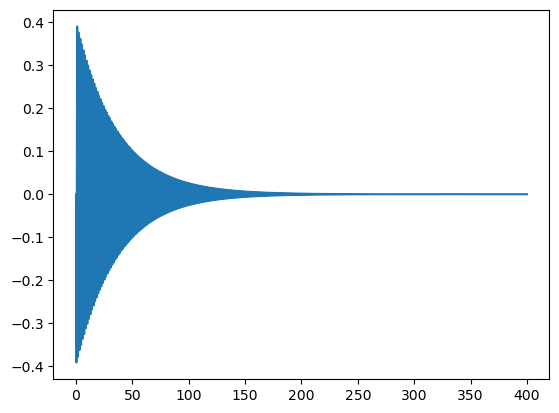

In [36]:
plt.plot(t,y[3,0])

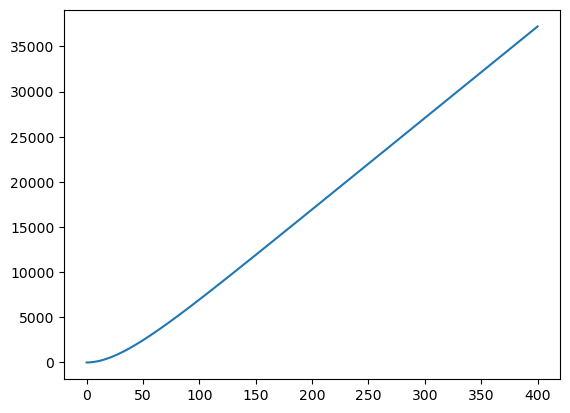

In [37]:
plt.plot(t,y[0,0])

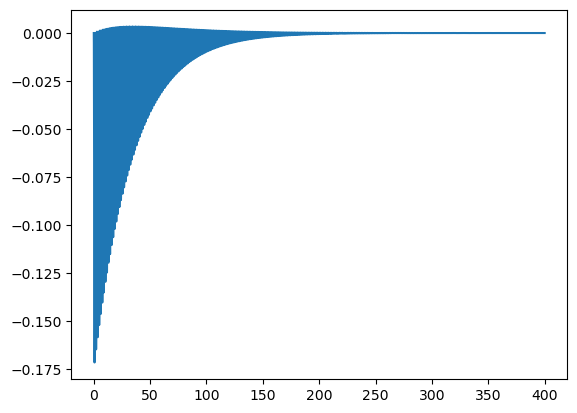

In [38]:
plt.plot(t,y[1,0])

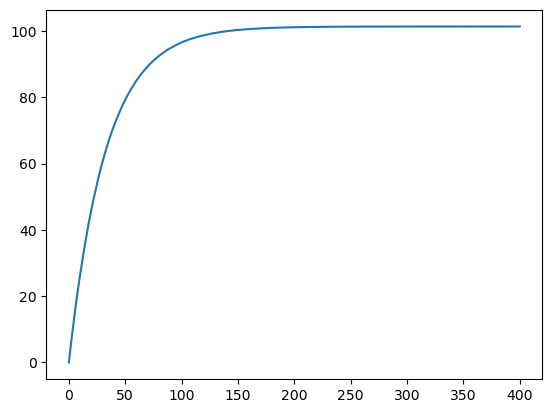

In [39]:
plt.plot(t,y[2,0])